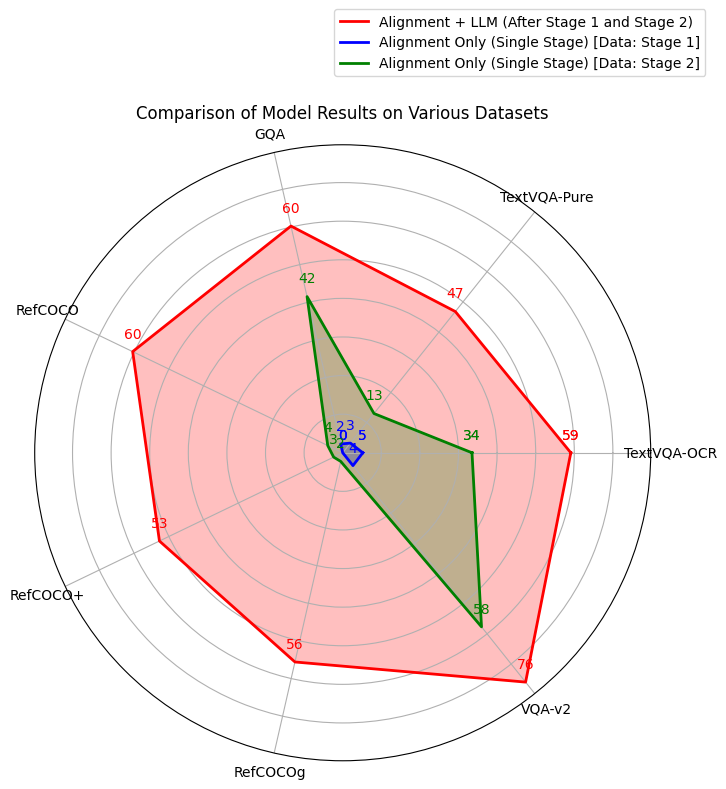

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the datasets and the models
datasets = ['TextVQA-OCR', 'TextVQA-Pure', 'GQA', 'RefCOCO', 'RefCOCO+', 'RefCOCOg', 'VQA-v2']
models = ['Alignment + LLM (After Stage 1 and Stage 2)', 'Alignment Only (Single Stage) [Data: Stage 1]', 'Alignment Only (Single Stage) [Data: Stage 2]']

# Define the results for each model on each dataset, missing data is set to None
results = {
    'Alignment + LLM (After Stage 1 and Stage 2)': [0.591, 0.468, 0.60250, 0.604, 0.527, 0.556, 0.76000],
    'Alignment Only (Single Stage) [Data: Stage 1]': [0.052, 0.032, 0.02340, 0.000, 0.000, 0.000, 0.0426],
    'Alignment Only (Single Stage) [Data: Stage 2]': [0.335, 0.130, 0.41500, 0.043, 0.026, 0.023, 0.57680]
}

# Convert results to percentages
for model in results:
    results[model] = [x * 100 if x is not None else None for x in results[model]]

# Normalize results for radar chart (Scale 0-100)
max_values = [max([results[model][i] for model in models if results[model][i] is not None]) for i in range(len(datasets))]
normalized_results = {
    model: [results[model][i] / max_values[i] * 100 if results[model][i] is not None else 0 for i in range(len(datasets))]
    for model in models
}

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(datasets), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for model, color in zip(models, ['red', 'blue', 'green']):
    data = results[model]
    data += data[:1]
    ax.fill(angles, data, color=color, alpha=0.25)
    ax.plot(angles, data, color=color, linewidth=2, label=model)

    for angle, value in zip(angles, data):
        ax.annotate(f"{value:.0f}", xy=(angle, value), textcoords="offset points", xytext=(0,10), ha='center', color=color)


# Labels for each point in radar chart
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(datasets)

plt.legend(loc='lower right', bbox_to_anchor=(1.1, 1.1))
plt.title('Comparison of Model Results on Various Datasets')
plt.show()

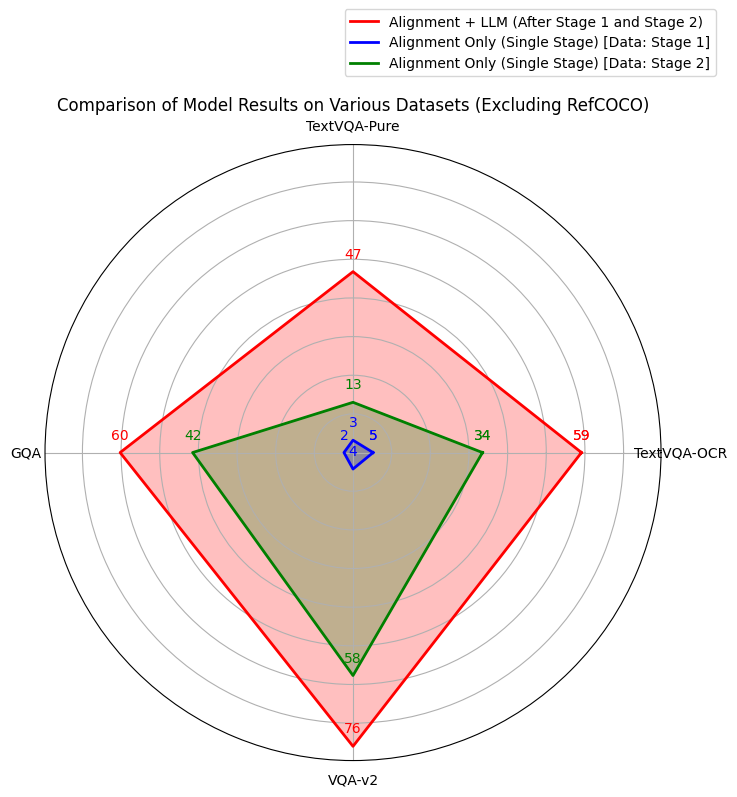

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Updated datasets list without RefCOCO datasets
datasets = ['TextVQA-OCR', 'TextVQA-Pure', 'GQA', 'VQA-v2']

# Updated models list with corrected naming
models = ['Alignment + LLM (After Stage 1 and Stage 2)', 'Alignment Only (Single Stage) [Data: Stage 1]', 'Alignment Only (Single Stage) [Data: Stage 2]']

# Define the results for each model on the updated dataset list, missing data is set to None
results = {
    'Alignment + LLM (After Stage 1 and Stage 2)': [0.591, 0.468, 0.60250, 0.76000],  # Removed RefCOCO data
    'Alignment Only (Single Stage) [Data: Stage 1]': [0.052, 0.032, 0.02340, 0.0426],  # Removed RefCOCO data
    'Alignment Only (Single Stage) [Data: Stage 2]': [0.335, 0.130, 0.41500, 0.57680]  # Removed RefCOCO data
}

# Convert results to percentages
for model in results:
    results[model] = [x * 100 if x is not None else None for x in results[model]]

# Normalize results for radar chart (Scale 0-100)
max_values = [max([results[model][i] for model in models if results[model][i] is not None]) for i in range(len(datasets))]
normalized_results = {
    model: [results[model][i] / max_values[i] * 100 if results[model][i] is not None else 0 for i in range(len(datasets))]
    for model in models
}

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(datasets), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for model, color in zip(models, ['red', 'blue', 'green']):
    data = results[model]
    data += data[:1]
    ax.fill(angles, data, color=color, alpha=0.25)
    ax.plot(angles, data, color=color, linewidth=2, label=model)

    for angle, value in zip(angles, data):
        ax.annotate(f"{value:.0f}", xy=(angle, value), textcoords="offset points", xytext=(0,10), ha='center', color=color)

# Labels for each point in radar chart
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(datasets)

plt.legend(loc='lower right', bbox_to_anchor=(1.1, 1.1))
plt.title('Comparison of Model Results on Various Datasets (Excluding RefCOCO)')
plt.show()
